In [21]:
import pandas as pd

# --- Load weekly data (all at week-end, e.g. Sundays) ---
intake_path = "program_intake_weekly.csv"
macro_path = "df_macro_weekly.csv"
index_path = "df_index_weekly.csv"

df_intake = pd.read_csv(intake_path, parse_dates=['week_end'])
df_macro  = pd.read_csv(macro_path,  parse_dates=['week_end'])
df_index  = pd.read_csv(index_path,  parse_dates=['week_end'])

print("Program Intake weekly:")
display(df_intake.head())
print(df_intake.info())

print("\nMacro weekly:")
display(df_macro.head())
print(df_macro.info())

print("\nIndex weekly:")
display(df_index.head())
print(df_index.info())

# --- 1) Merge intake with macro on week_end ---
df_all = (
    df_intake
      .merge(df_macro, on='week_end', how='inner')   # only weeks present in both
)

# --- 2) Merge result with index features on week_end ---
df_all = df_all.merge(df_index, on='week_end', how='inner')

print("\nAfter merging intake + macro + index:")
print(df_all.shape)
display(df_all.head())

# (Optional but helpful) Rename week_end → date for modeling
df_all = df_all.rename(columns={'week_end': 'date'})


Program Intake weekly:


,week_end,Asylum Integration Program (AIP),CNC/Precision Machining Skills Training Program,Community Connections - Group Activities,Community Connections - Mentorship,Employment Accessibility Services,Employment Ontario,Enhanced Language Training,Family Finance Clinic,Family Newcomer Services,...,Personalized Career Accelerator (PCA),Plumbing Pre-Apprenticeship Level 1 Program,Project: Income Transition Project,Tax Clinic,Tax Skills for Self-Employed Workers,Toronto Youth Job Corp,Visual Effects Compositing Program,Youth Housing Navigation and Subsidy Support Program,Youth Job Connections (YJC),Youth Job Connections Summer (YJC Summer)
0,2021-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-03-14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-03-21,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-03-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-04-04,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 29 columns):
 #   Column                                                                    Non-Null Count  Dtype         
---  ------                                                                    --------------  -----         
 0   week_end                                                                  242 non-null    datetime64[ns]
 1   Asylum Integration Program (AIP)                                          242 non-null    float64       
 2   CNC/Precision Machining Skills Training Program                           242 non-null    float64       
 3   Community Connections - Group Activities                                  242 non-null    float64       
 4   Community Connections - Mentorship                                        242 non-null    float64       
 5   Employment Accessibility Services                                         242 non-null    float64       
 6   Employment

,week_end,goc_long_benchmark,goc_long_benchmark1,goc_2y_benchmark,goc_3y_benchmark,goc_5y_benchmark,goc_7y_benchmark,goc_10y_benchmark,goc_avg_over10y,spread_10y_2y,...,TBCDN1YMID,FXUSDCAD,FXEURCAD,EURUSD,USDCAD_ret,DGS10,DFF,T10YIE,DTWEXBGS,CPIAUCSL
0,2021-03-07,1.830,0.166,0.264,0.392,0.844,1.088,1.414,1.750,1.150,...,0.174,1.26446,1.52008,1.202163,-0.000266,1.488,0.070,2.198,112.86818,264.8470
1,2021-03-14,1.898,0.190,0.272,0.494,0.930,1.206,1.480,1.822,1.208,...,0.192,1.25972,1.50092,1.191486,-0.002775,1.570,0.070,2.244,113.56036,264.8470
2,2021-03-21,2.048,0.292,0.284,0.534,1.010,1.280,1.576,1.962,1.292,...,0.172,1.24728,1.48610,1.191473,0.000210,1.664,0.070,2.290,113.03020,264.8470
3,2021-03-28,1.950,0.190,0.242,0.486,0.938,1.196,1.492,1.876,1.250,...,0.150,1.25646,1.48766,1.184021,0.001183,1.648,0.070,2.318,113.55108,264.8470
4,2021-04-04,1.962,0.220,0.224,0.484,0.974,1.232,1.526,1.892,1.302,...,0.148,1.25860,1.47918,1.175260,-0.000395,1.722,0.068,2.358,113.89766,265.5582


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   week_end             242 non-null    datetime64[ns]
 1   goc_long_benchmark   242 non-null    float64       
 2   goc_long_benchmark1  242 non-null    float64       
 3   goc_2y_benchmark     242 non-null    float64       
 4   goc_3y_benchmark     242 non-null    float64       
 5   goc_5y_benchmark     242 non-null    float64       
 6   goc_7y_benchmark     242 non-null    float64       
 7   goc_10y_benchmark    242 non-null    float64       
 8   goc_avg_over10y      242 non-null    float64       
 9   spread_10y_2y        242 non-null    float64       
 10  spread_10y_5y        242 non-null    float64       
 11  V39079               242 non-null    float64       
 12  AVGINTWO             242 non-null    float64       
 13  TBCDN30DMID          242 non-null  

,week_end,macro_economy_text_information,woodgreen_housing_demand_text_information,woodgreen_cost_of_living_text_information,woodgreen_employment_text_information,woodgreen_mental_health_text_information,woodgreen_food_security_text_information,woodgreen_newcomer_settlement_text_information,woodgreen_seniors_care_text_information,woodgreen_family_violence_text_information
0,2021-03-07,-0.542208,0.621375,0.136496,-1.221134,1.028172,0.091205,0.540295,0.461096,1.860368
1,2021-03-14,-0.454451,0.609887,0.126942,-1.323509,1.050778,-0.023830,0.479005,0.398797,1.704761
2,2021-03-21,-0.366695,0.598398,0.117389,-1.425885,1.073384,-0.138866,0.417715,0.336499,1.549153
3,2021-03-28,-0.278938,0.586910,0.107835,-1.528261,1.095989,-0.253901,0.356426,0.274200,1.393546
4,2021-04-04,-0.223556,0.570998,0.097724,-1.619435,1.129172,-0.336463,0.304243,0.215908,1.264500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   week_end                                        242 non-null    datetime64[ns]
 1   macro_economy_text_information                  242 non-null    float64       
 2   woodgreen_housing_demand_text_information       242 non-null    float64       
 3   woodgreen_cost_of_living_text_information       242 non-null    float64       
 4   woodgreen_employment_text_information           242 non-null    float64       
 5   woodgreen_mental_health_text_information        242 non-null    float64       
 6   woodgreen_food_security_text_information        242 non-null    float64       
 7   woodgreen_newcomer_settlement_text_information  242 non-null    float64       
 8   woodgreen_seniors_care_text_information         24

,week_end,Asylum Integration Program (AIP),CNC/Precision Machining Skills Training Program,Community Connections - Group Activities,Community Connections - Mentorship,Employment Accessibility Services,Employment Ontario,Enhanced Language Training,Family Finance Clinic,Family Newcomer Services,...,CPIAUCSL,macro_economy_text_information,woodgreen_housing_demand_text_information,woodgreen_cost_of_living_text_information,woodgreen_employment_text_information,woodgreen_mental_health_text_information,woodgreen_food_security_text_information,woodgreen_newcomer_settlement_text_information,woodgreen_seniors_care_text_information,woodgreen_family_violence_text_information
0,2021-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,264.8470,-0.542208,0.621375,0.136496,-1.221134,1.028172,0.091205,0.540295,0.461096,1.860368
1,2021-03-14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,...,264.8470,-0.454451,0.609887,0.126942,-1.323509,1.050778,-0.023830,0.479005,0.398797,1.704761
2,2021-03-21,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,264.8470,-0.366695,0.598398,0.117389,-1.425885,1.073384,-0.138866,0.417715,0.336499,1.549153
3,2021-03-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,264.8470,-0.278938,0.586910,0.107835,-1.528261,1.095989,-0.253901,0.356426,0.274200,1.393546
4,2021-04-04,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,265.5582,-0.223556,0.570998,0.097724,-1.619435,1.129172,-0.336463,0.304243,0.215908,1.264500


In [22]:
# --- 3) Keep only weeks where all needed numeric features exist ---

# All numeric columns (target + predictors)
numeric_cols = df_all.select_dtypes(include='number').columns.tolist()

print("\nTotal numeric columns:", len(numeric_cols))
print("Example numeric columns:", numeric_cols[:10])

# Drop any week that is missing numeric features
before = df_all.shape[0]
df_all = df_all.dropna(subset=numeric_cols)
after = df_all.shape[0]

print(f"\nRows before dropna: {before}, after dropna: {after}")
display(df_all.head())



Total numeric columns: 62
Example numeric columns: ['Asylum Integration Program (AIP)', 'CNC/Precision Machining Skills Training Program', 'Community Connections - Group Activities', 'Community Connections - Mentorship', 'Employment Accessibility Services', 'Employment Ontario', 'Enhanced Language Training', 'Family Finance Clinic', 'Family Newcomer Services', 'Financial Empowerment Counselling']

Rows before dropna: 242, after dropna: 242


,date,Asylum Integration Program (AIP),CNC/Precision Machining Skills Training Program,Community Connections - Group Activities,Community Connections - Mentorship,Employment Accessibility Services,Employment Ontario,Enhanced Language Training,Family Finance Clinic,Family Newcomer Services,...,CPIAUCSL,macro_economy_text_information,woodgreen_housing_demand_text_information,woodgreen_cost_of_living_text_information,woodgreen_employment_text_information,woodgreen_mental_health_text_information,woodgreen_food_security_text_information,woodgreen_newcomer_settlement_text_information,woodgreen_seniors_care_text_information,woodgreen_family_violence_text_information
0,2021-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,264.8470,-0.542208,0.621375,0.136496,-1.221134,1.028172,0.091205,0.540295,0.461096,1.860368
1,2021-03-14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,...,264.8470,-0.454451,0.609887,0.126942,-1.323509,1.050778,-0.023830,0.479005,0.398797,1.704761
2,2021-03-21,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,264.8470,-0.366695,0.598398,0.117389,-1.425885,1.073384,-0.138866,0.417715,0.336499,1.549153
3,2021-03-28,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,264.8470,-0.278938,0.586910,0.107835,-1.528261,1.095989,-0.253901,0.356426,0.274200,1.393546
4,2021-04-04,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,265.5582,-0.223556,0.570998,0.097724,-1.619435,1.129172,-0.336463,0.304243,0.215908,1.264500


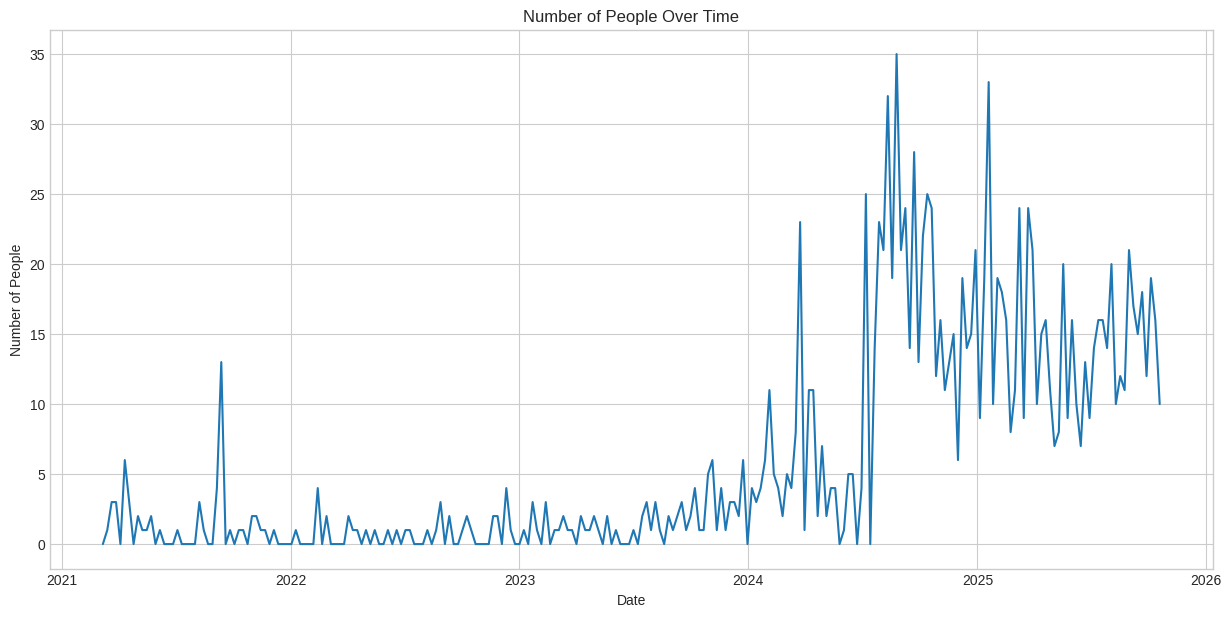

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot for 'number of people' over time
plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y='Newcomer Settlement and Integration Services (Newcomer Services Program)', data=df_all)
plt.title('Number of People Over Time')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

Shape of df_numerical_filtered before correlation: (242, 35)
Correlations with 'Newcomer Settlement and Integration Services (Newcomer Services Program)':


,Newcomer Settlement and Integration Services (Newcomer Services Program)
CPIAUCSL,0.609176
FXUSDCAD,0.597998
FXEURCAD,0.586099
DTWEXBGS,0.482328
DGS10,0.465191
DFF,0.414281
goc_long_benchmark,0.397736
goc_long_benchmark1,0.390516
woodgreen_employment_text_information,0.369066
goc_avg_over10y,0.366293


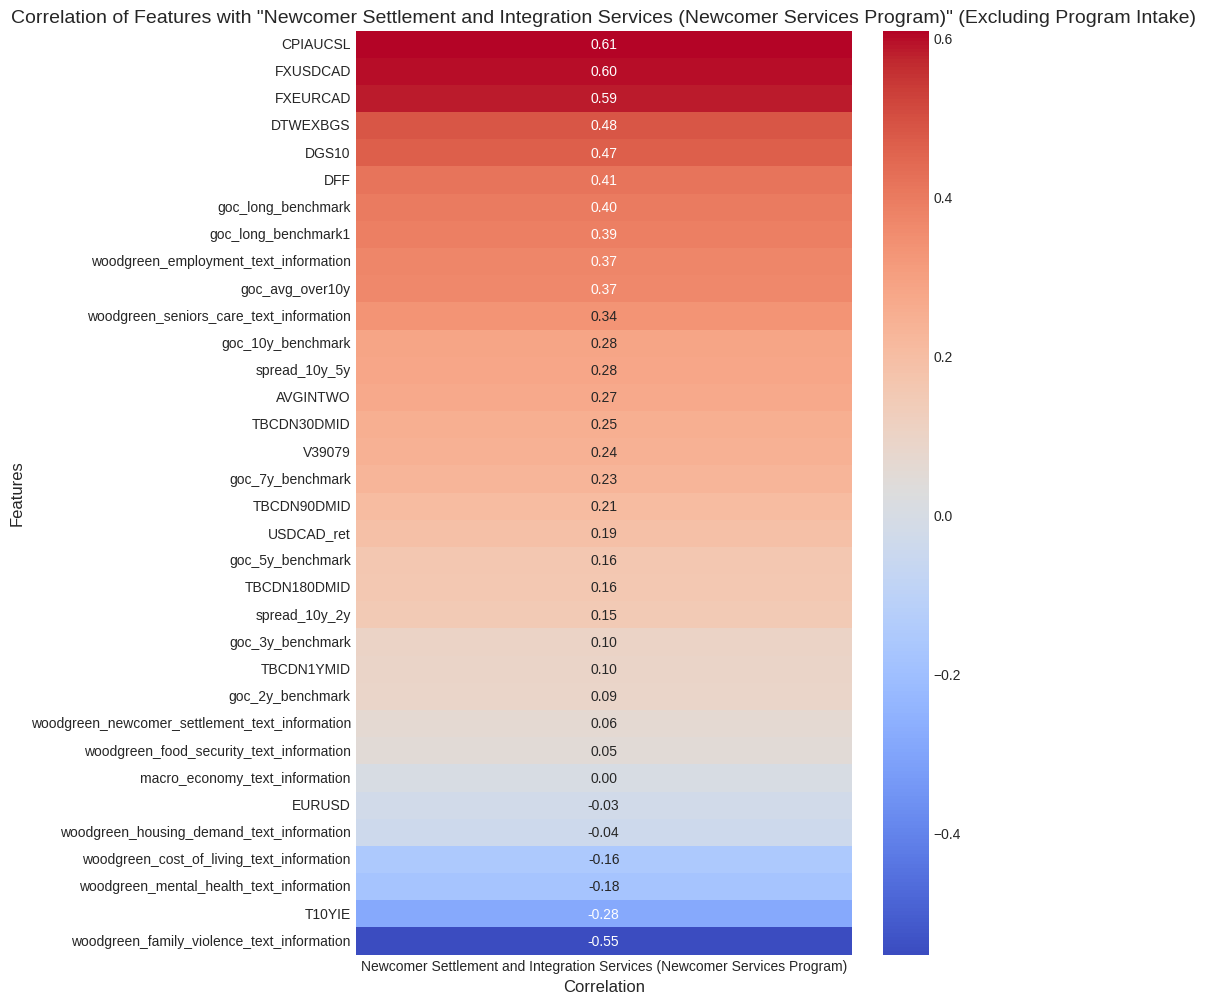

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'date' column for correlation calculation
df_numerical = df_all.drop(columns=['date'])

# Identify program intake columns by checking if they are also in df_intake's columns
# Ensure 'Tax Clinic' is NOT included in the columns to be dropped
program_intake_cols = [col for col in df_intake.columns if col != 'week_end' and col != 'Newcomer Settlement and Integration Services (Newcomer Services Program)']

# Filter out program intake columns to create df_numerical_filtered
df_numerical_filtered = df_numerical.drop(columns=program_intake_cols, errors='ignore')

print(f"Shape of df_numerical_filtered before correlation: {df_numerical_filtered.shape}")

# Calculate the correlation matrix for the numerical filtered DataFrame
correlation_matrix_filtered = df_numerical_filtered.corr()

# Extract correlations with 'Tax Clinic'
# Ensure 'Tax Clinic' is in the filtered dataframe before trying to access its correlations
if 'Newcomer Settlement and Integration Services (Newcomer Services Program)' in correlation_matrix_filtered.columns:
    correlation_with_tax_clinic = correlation_matrix_filtered['Newcomer Settlement and Integration Services (Newcomer Services Program)'].drop('Newcomer Settlement and Integration Services (Newcomer Services Program)', errors='ignore')
else:
    print("'Newcomer Settlement and Integration Services (Newcomer Services Program)' column not found in the filtered numerical DataFrame.")
    correlation_with_tax_clinic = pd.Series()

# Sort the correlations for better visualization
correlation_with_tax_clinic_sorted = correlation_with_tax_clinic.sort_values(ascending=False)

print("Correlations with 'Newcomer Settlement and Integration Services (Newcomer Services Program)':")
display(correlation_with_tax_clinic_sorted)

# Create a heatmap only if there are correlations to display
if not correlation_with_tax_clinic_sorted.empty:
    plt.figure(figsize=(8, 12)) # Adjusted for better readability
    sns.heatmap(correlation_with_tax_clinic_sorted.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title('Correlation of Features with "Newcomer Settlement and Integration Services (Newcomer Services Program)" (Excluding Program Intake)', fontsize=14)
    plt.ylabel('Features', fontsize=12)
    plt.xlabel('Correlation', fontsize=12)
    plt.show()
else:
    print("No correlations to display after filtering.")

In [25]:
# --- 4) Add simple lag features (no leakage) ---

# Sort by time (and by program_name if it exists)
sort_keys = ['date']
if 'program_name' in df_all.columns:
    sort_keys = ['program_name', 'date']

df_all = df_all.sort_values(sort_keys).reset_index(drop=True)

target_col = 'Newcomer Settlement and Integration Services (Newcomer Services Program)'

# Example in the instructions:
# df = df.sort_values(["program_name", "date"])
# df["number_of_people_lag1"] = df.groupby("program_name")["number_of_people"].shift(1)

if 'program_name' in df_all.columns:
    df_all[f'{target_col}_lag1'] = (
        df_all.groupby('program_name')[target_col].shift(1)
    )
else:
    # No program_name → just a single series
    df_all[f'{target_col}_lag1'] = df_all[target_col].shift(1)

print(f"\nAfter adding target lag for '{target_col}':")
display(df_all[['date', target_col, f'{target_col}_lag1']].head(10))


After adding target lag for 'Newcomer Settlement and Integration Services (Newcomer Services Program)':


,date,Newcomer Settlement and Integration Services (Newcomer Services Program),Newcomer Settlement and Integration Services (Newcomer Services Program)_lag1
0,2021-03-07,0.0,NaN
1,2021-03-14,1.0,0.0
2,2021-03-21,3.0,1.0
3,2021-03-28,3.0,3.0
4,2021-04-04,0.0,3.0
5,2021-04-11,6.0,0.0
6,2021-04-18,3.0,6.0
7,2021-04-25,0.0,3.0
8,2021-05-02,2.0,0.0
9,2021-05-09,1.0,2.0



--- Lagged Correlations ---
Lagged Correlations with 'Newcomer Settlement and Integration Services (Newcomer Services Program)':


,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Asylum Integration Program (AIP),0.442856,0.429256,0.47162,0.390907,0.409847,0.366108,0.415624,0.382869,0.35833,0.365845,0.429653,0.359608,0.349345,0.340339
CNC/Precision Machining Skills Training Program,0.081693,0.125883,0.125732,0.157599,0.134245,0.120007,0.269512,0.19809,0.137243,0.15757,0.173462,0.076662,0.067381,0.157655
Community Connections - Group Activities,0.559375,0.588991,0.577332,0.552061,0.568678,0.576344,0.550218,0.564198,0.578395,0.551915,0.545322,0.533477,0.550442,0.472946
Community Connections - Mentorship,0.388703,0.297096,0.355353,0.411999,0.372187,0.366198,0.395048,0.408651,0.402584,0.359975,0.484348,0.369375,0.340925,0.313148
Employment Accessibility Services,0.090356,0.129495,0.26458,0.191243,0.303221,0.166573,0.318227,0.172487,0.217129,0.150383,0.239432,0.112423,0.171135,0.189589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
woodgreen_mental_health_text_information,-0.21203,-0.234834,-0.26353,-0.290189,-0.315695,-0.343154,-0.366851,-0.376233,-0.377557,-0.370483,-0.353526,-0.34816,-0.356072,-0.365365
woodgreen_food_security_text_information,0.051281,0.059379,0.072134,0.079988,0.088348,0.099334,0.098217,0.09358,0.088963,0.084694,0.088832,0.100751,0.116972,0.132426
woodgreen_newcomer_settlement_text_information,0.07096,0.076301,0.082171,0.092914,0.101268,0.108308,0.112538,0.115315,0.118626,0.125341,0.136183,0.143962,0.147168,0.149708
woodgreen_seniors_care_text_information,0.330987,0.335868,0.340888,0.347764,0.347448,0.336217,0.31911,0.305092,0.2892,0.280933,0.275256,0.258891,0.235091,0.214046


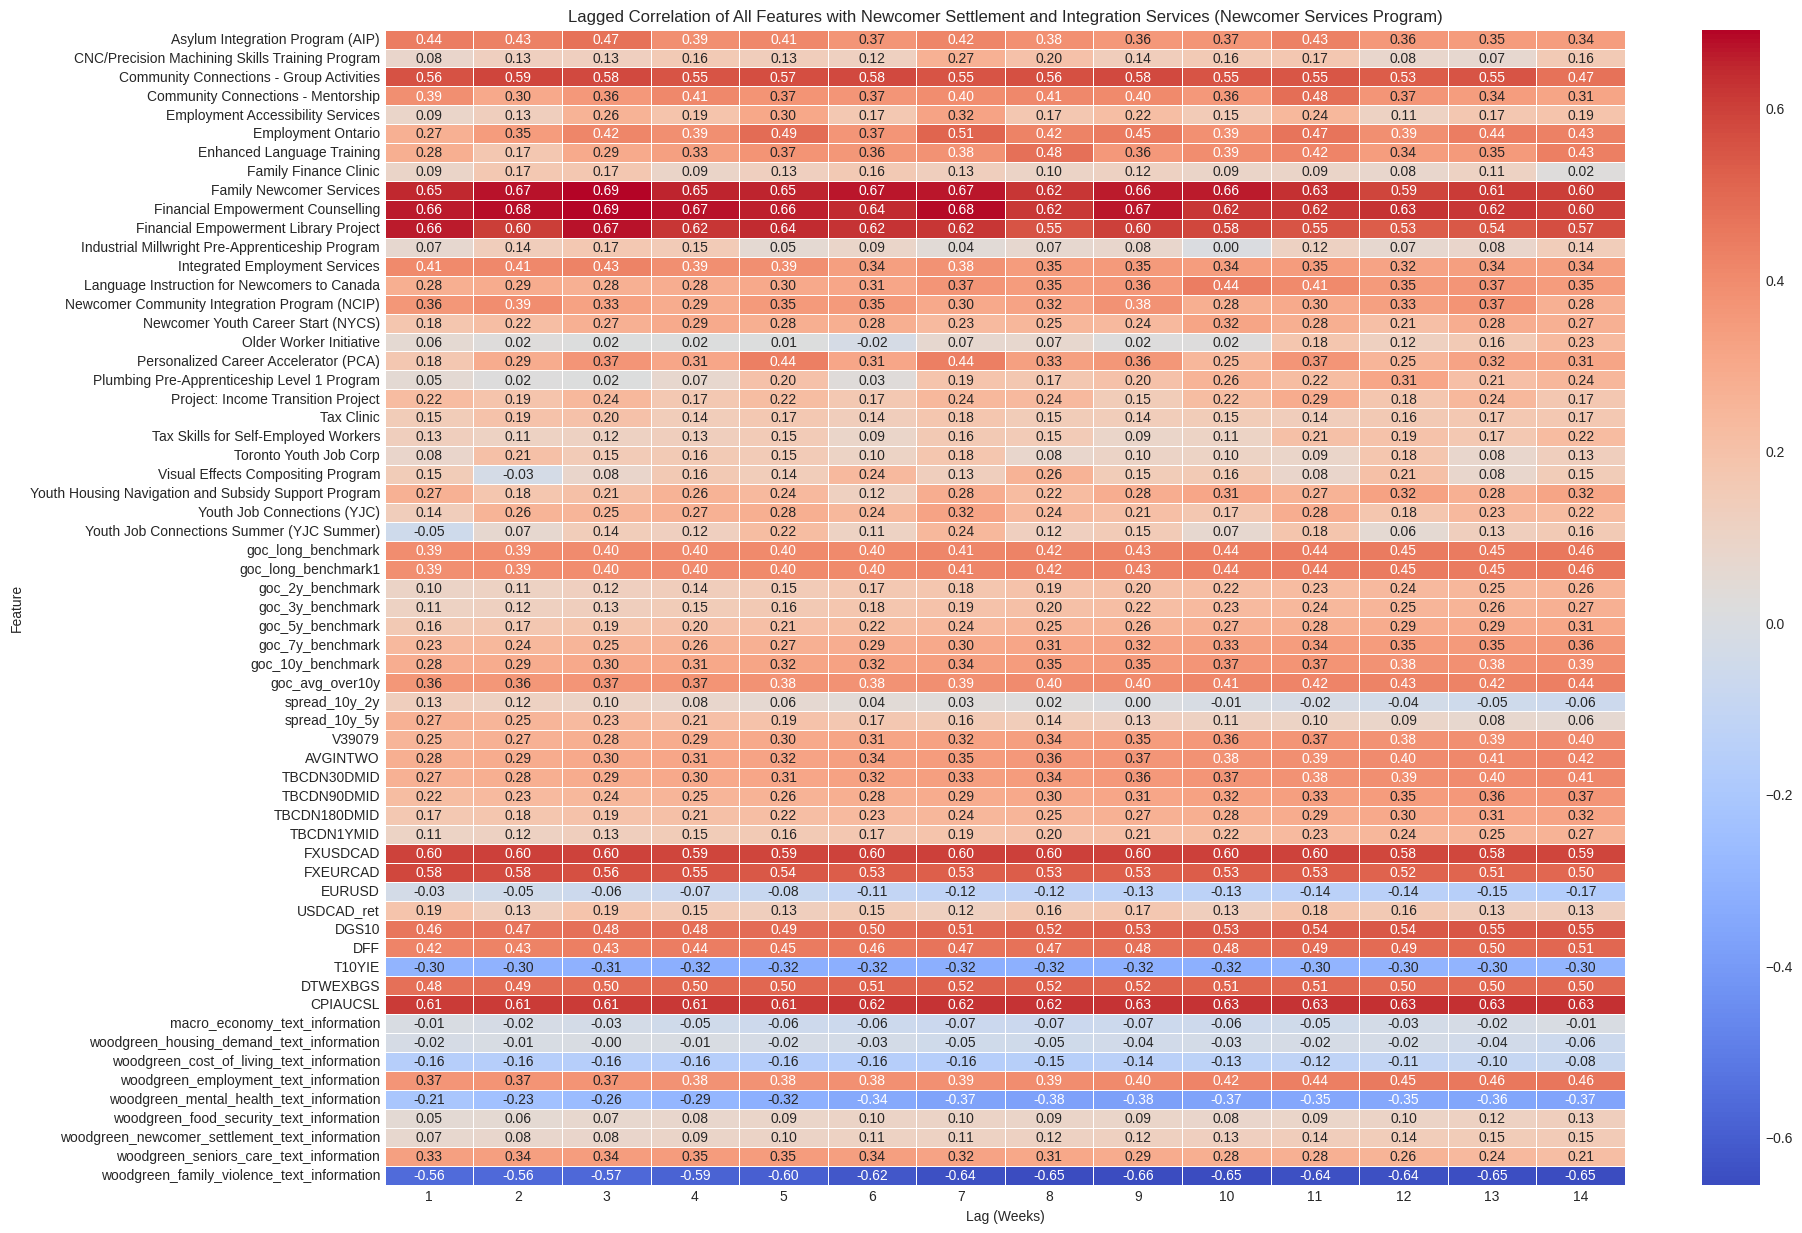


--- Moving Averages ---


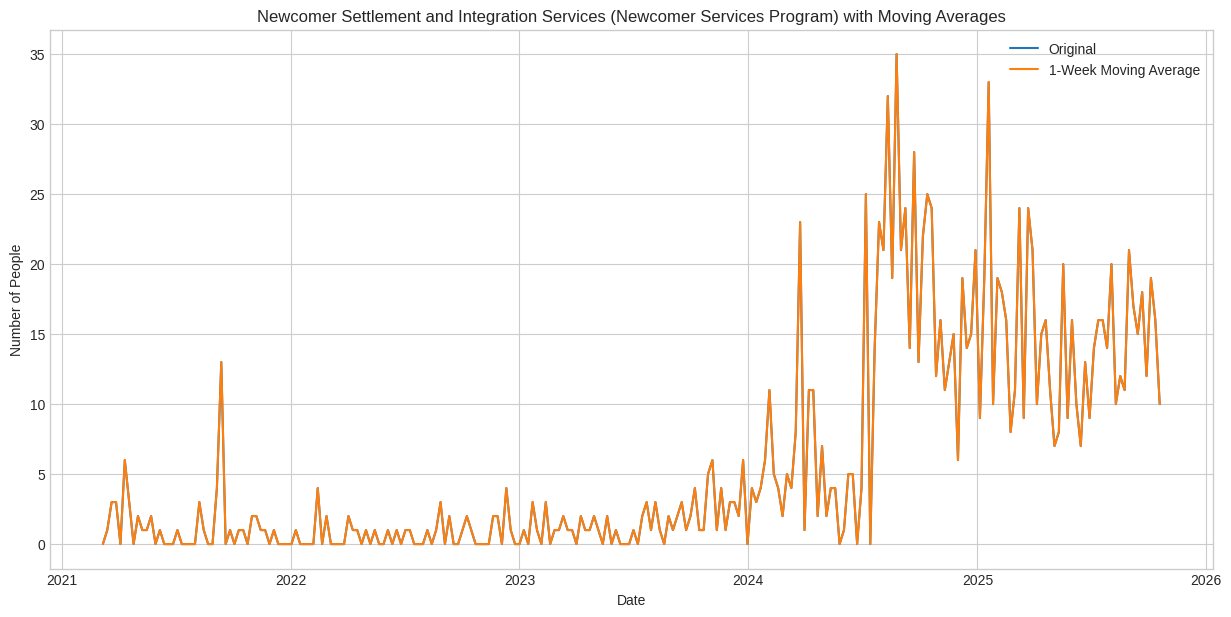

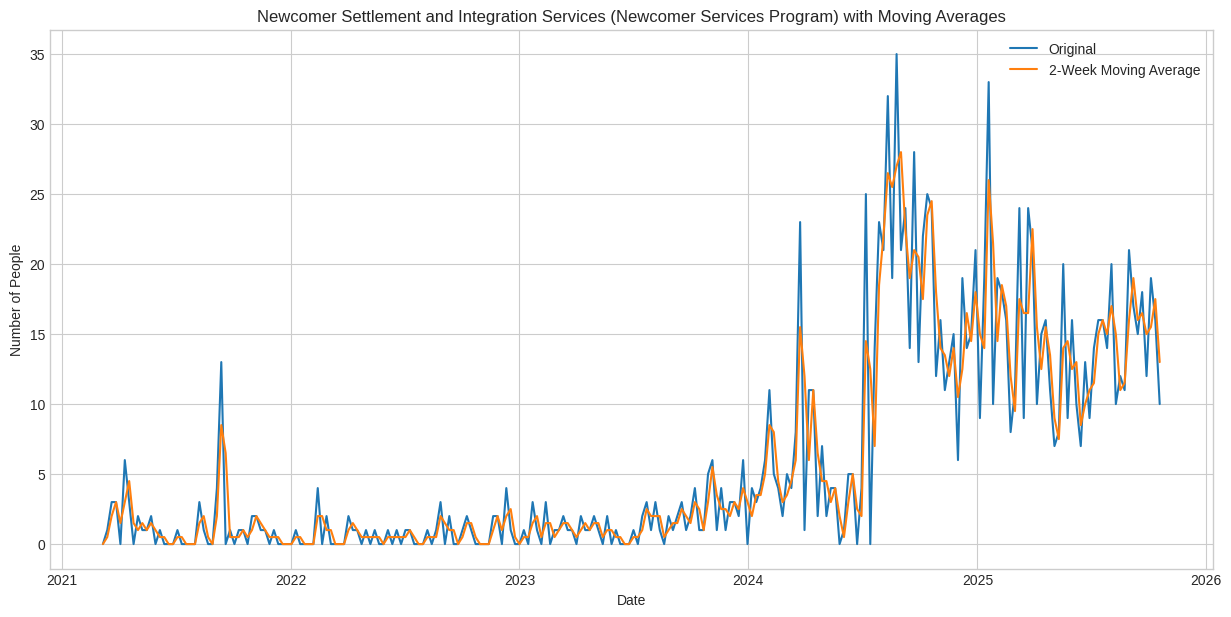

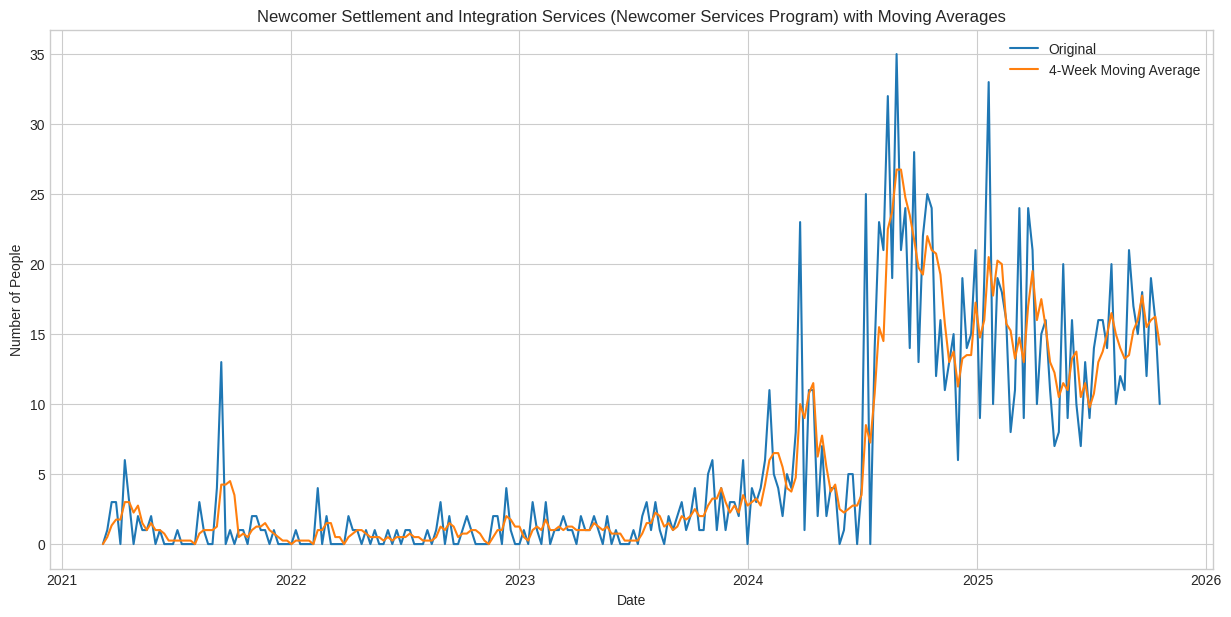

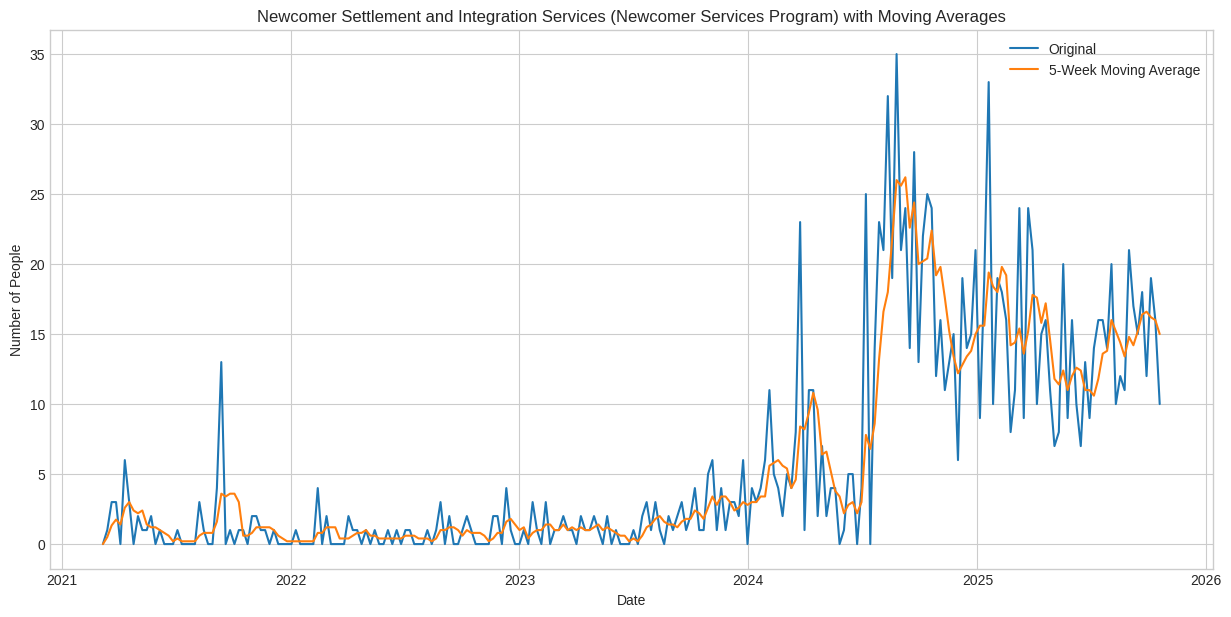

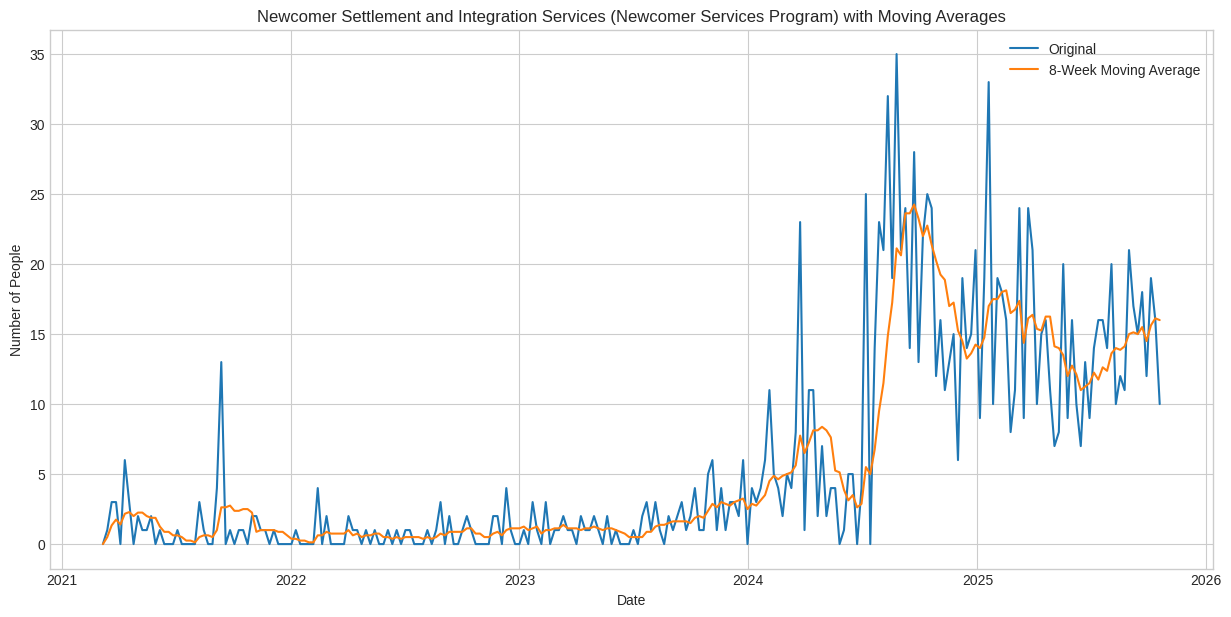

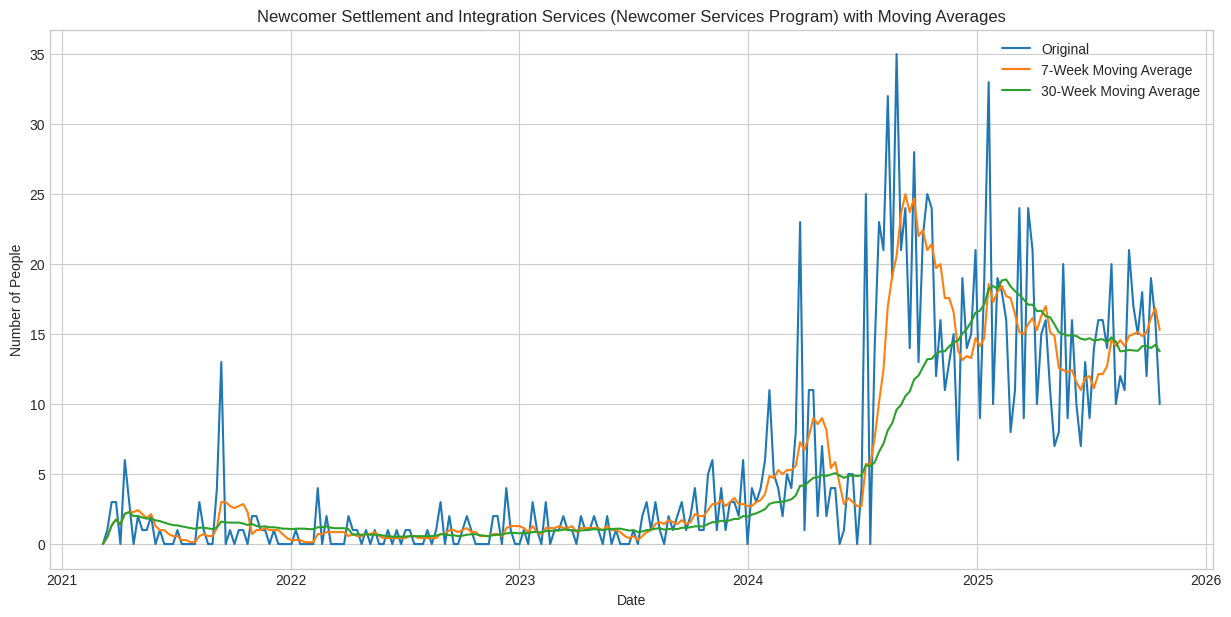

First few rows of df_all with moving averages:


,Newcomer Settlement and Integration Services (Newcomer Services Program),Newcomer Settlement and Integration Services (Newcomer Services Program)_MA7,Newcomer Settlement and Integration Services (Newcomer Services Program)_MA30
0,0.0,0.000000,0.000000
1,1.0,0.500000,0.500000
2,3.0,1.333333,1.333333
3,3.0,1.750000,1.750000
4,0.0,1.400000,1.400000


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataframe is sorted by date for time-series operations
df_all = df_all.sort_values(by='date').reset_index(drop=True)

# --- Lagged Correlations ---
print("\n--- Lagged Correlations ---")

target_variable = 'Newcomer Settlement and Integration Services (Newcomer Services Program)'
# Select all features for lagged correlation analysis, excluding 'date' and the target itself
all_columns = df_all.columns.tolist()
features_for_lagged_corr = [col for col in all_columns if col not in ['date', target_variable, f'{target_variable}_MA1', f'{target_variable}_MA2', f'{target_variable}_MA7', f'{target_variable}_MA30', f'{target_variable}_lag1']]

max_lag = 14 # Analyze correlations up to 14 weeks lag

lagged_correlations = pd.DataFrame(index=features_for_lagged_corr, columns=range(1, max_lag + 1))

for feature in features_for_lagged_corr:
    for lag in range(1, max_lag + 1):
        # Create a lagged version of the feature
        lagged_feature = df_all[feature].shift(lag)
        # Calculate correlation, dropping NaNs introduced by shifting
        correlation = df_all[target_variable].corr(lagged_feature)
        lagged_correlations.loc[feature, lag] = correlation

print(f"Lagged Correlations with '{target_variable}':")
display(lagged_correlations)

# Visualize lagged correlations
plt.figure(figsize=(20, 15)) # Increased figure size for more features
sns.heatmap(lagged_correlations.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Lagged Correlation of All Features with {target_variable}')
plt.xlabel('Lag (Weeks)')
plt.ylabel('Feature')
plt.show()

# --- Moving Averages ---
print("\n--- Moving Averages ---")

# Calculate moving averages for 'Tax Clinic'
df_all[f'{target_variable}_MA1'] = df_all[target_variable].rolling(window=1, min_periods=1).mean()
df_all[f'{target_variable}_MA2'] = df_all[target_variable].rolling(window=2, min_periods=1).mean()
df_all[f'{target_variable}_MA4'] = df_all[target_variable].rolling(window=4, min_periods=1).mean()
df_all[f'{target_variable}_MA5'] = df_all[target_variable].rolling(window=5, min_periods=1).mean()
df_all[f'{target_variable}_MA7'] = df_all[target_variable].rolling(window=7, min_periods=1).mean()
df_all[f'{target_variable}_MA8'] = df_all[target_variable].rolling(window=8, min_periods=1).mean()
df_all[f'{target_variable}_MA30'] = df_all[target_variable].rolling(window=30, min_periods=1).mean()

# Plot 'Tax Clinic' with its moving averages
plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y=target_variable, data=df_all, label='Original')
sns.lineplot(x='date', y=f'{target_variable}_MA1', data=df_all, label='1-Week Moving Average')
plt.title(f'{target_variable} with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y=target_variable, data=df_all, label='Original')
sns.lineplot(x='date', y=f'{target_variable}_MA2', data=df_all, label='2-Week Moving Average')
plt.title(f'{target_variable} with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y=target_variable, data=df_all, label='Original')
sns.lineplot(x='date', y=f'{target_variable}_MA4', data=df_all, label='4-Week Moving Average')
plt.title(f'{target_variable} with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y=target_variable, data=df_all, label='Original')
sns.lineplot(x='date', y=f'{target_variable}_MA5', data=df_all, label='5-Week Moving Average')
plt.title(f'{target_variable} with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y=target_variable, data=df_all, label='Original')
sns.lineplot(x='date', y=f'{target_variable}_MA8', data=df_all, label='8-Week Moving Average')
plt.title(f'{target_variable} with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y=target_variable, data=df_all, label='Original')
sns.lineplot(x='date', y=f'{target_variable}_MA7', data=df_all, label='7-Week Moving Average')
sns.lineplot(x='date', y=f'{target_variable}_MA30', data=df_all, label='30-Week Moving Average')
plt.title(f'{target_variable} with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True)
plt.show()

print("First few rows of df_all with moving averages:")
display(df_all[[target_variable, f'{target_variable}_MA7', f'{target_variable}_MA30']].head())

In [27]:
# Identify all program intake columns from the original df_intake, excluding 'week_end' and 'Tax Clinic'
program_columns_to_drop = [col for col in df_intake.columns if col != 'week_end' and col != 'Newcomer Settlement and Integration Services (Newcomer Services Program)']

# Drop these columns from df_all
df_all_filtered = df_all.drop(columns=program_columns_to_drop, errors='ignore')

print("DataFrame after dropping all program columns except 'Newcomer Settlement and Integration Services (Newcomer Services Program)':")
print(df_all_filtered.shape)
display(df_all_filtered.head())

# Save the merged DataFrame to a CSV file
df_all_filtered.to_csv('macro_index_Newcomer_Settlement_and_Integration_Services_(Newcomer Services Program)_only.csv', index=False)


DataFrame after dropping all program columns except 'Newcomer Settlement and Integration Services (Newcomer Services Program)':
(242, 44)


,date,Newcomer Settlement and Integration Services (Newcomer Services Program),goc_long_benchmark,goc_long_benchmark1,goc_2y_benchmark,goc_3y_benchmark,goc_5y_benchmark,goc_7y_benchmark,goc_10y_benchmark,goc_avg_over10y,...,woodgreen_seniors_care_text_information,woodgreen_family_violence_text_information,Newcomer Settlement and Integration Services (Newcomer Services Program)_lag1,Newcomer Settlement and Integration Services (Newcomer Services Program)_MA1,Newcomer Settlement and Integration Services (Newcomer Services Program)_MA2,Newcomer Settlement and Integration Services (Newcomer Services Program)_MA4,Newcomer Settlement and Integration Services (Newcomer Services Program)_MA5,Newcomer Settlement and Integration Services (Newcomer Services Program)_MA7,Newcomer Settlement and Integration Services (Newcomer Services Program)_MA8,Newcomer Settlement and Integration Services (Newcomer Services Program)_MA30
0,2021-03-07,0.0,1.830,0.166,0.264,0.392,0.844,1.088,1.414,1.750,...,0.461096,1.860368,NaN,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-03-14,1.0,1.898,0.190,0.272,0.494,0.930,1.206,1.480,1.822,...,0.398797,1.704761,0.0,1.0,0.5,0.500000,0.500000,0.500000,0.500000,0.500000
2,2021-03-21,3.0,2.048,0.292,0.284,0.534,1.010,1.280,1.576,1.962,...,0.336499,1.549153,1.0,3.0,2.0,1.333333,1.333333,1.333333,1.333333,1.333333
3,2021-03-28,3.0,1.950,0.190,0.242,0.486,0.938,1.196,1.492,1.876,...,0.274200,1.393546,3.0,3.0,3.0,1.750000,1.750000,1.750000,1.750000,1.750000
4,2021-04-04,0.0,1.962,0.220,0.224,0.484,0.974,1.232,1.526,1.892,...,0.215908,1.264500,3.0,0.0,1.5,1.750000,1.400000,1.400000,1.400000,1.400000


📊 CALCULATING PERFORMANCE METRICS...

🏆 TOP 5 PERFORMING CONFIGURATIONS (Lowest RMSE):
Method      MAE     RMSE
 SMA_3 2.652720 4.310151
 SMA_4 2.713235 4.366092
 EMA_8 2.633120 4.374701
 WMA_8 2.650760 4.396530
 WMA_4 2.716807 4.418354

ℹ️  Plotting comparison for Window Size: 8


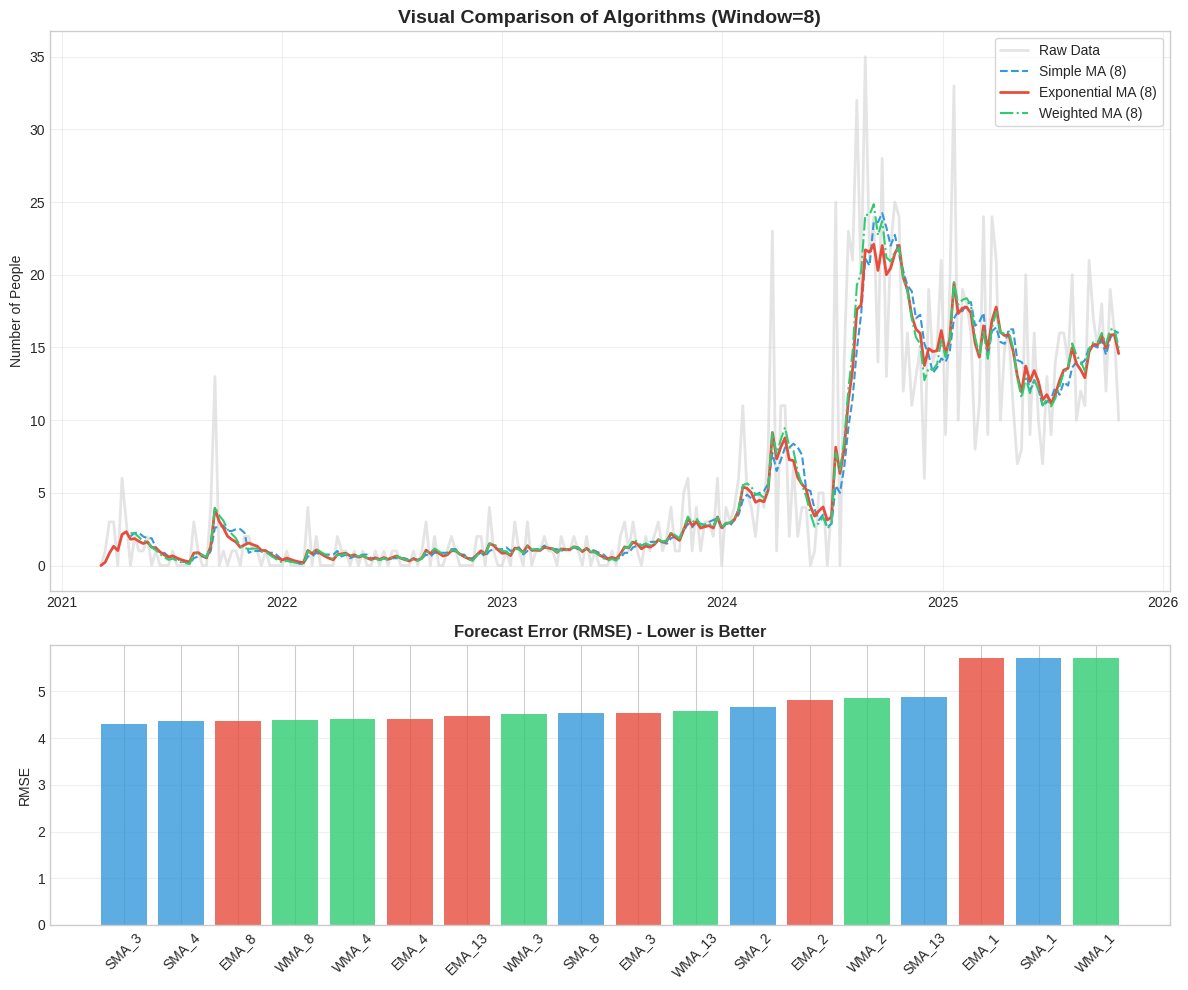

✅ RECOMMENDATION: SMA_3
   RMSE Score: 4.31


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---------------------------------------------------------------------------
# 1. SETUP & HELPER FUNCTIONS
# ---------------------------------------------------------------------------
filename = '/content/macro_index_Newcomer_Settlement_and_Integration_Services_(Newcomer Services Program)_only.csv'
df = pd.read_csv(filename)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.asfreq('W-SUN')
target = df['Newcomer Settlement and Integration Services (Newcomer Services Program)'].dropna()

# Define custom Weighted Moving Average (Linear weights: 1, 2, 3... n)
def linear_wma(x):
    weights = np.arange(1, len(x) + 1)
    return np.dot(x, weights) / weights.sum()

# Function to calculate errors
def evaluate_forecast(actual, forecast):
    comp = pd.DataFrame({'act': actual, 'fcst': forecast}).dropna()
    if len(comp) == 0: return np.inf, np.inf
    mae = mean_absolute_error(comp['act'], comp['fcst'])
    rmse = np.sqrt(mean_squared_error(comp['act'], comp['fcst']))
    return mae, rmse

# ---------------------------------------------------------------------------
# 2. COMPUTE DIFFERENT ROLLING AVERAGES
# ---------------------------------------------------------------------------
print("📊 CALCULATING PERFORMANCE METRICS...")

# You can add as many windows here as you like; the code will now handle it safely
windows = [1, 2, 3, 4, 8, 13]
results = []
models = {}

for w in windows:
    # A. Simple Moving Average (SMA)
    sma = target.rolling(window=w).mean()

    # B. Exponential Moving Average (EMA)
    ema = target.ewm(span=w, adjust=False).mean()

    # C. Weighted Moving Average (WMA)
    wma = target.rolling(window=w).apply(linear_wma, raw=True)

    # Store
    current_methods = {f'SMA_{w}': sma, f'EMA_{w}': ema, f'WMA_{w}': wma}
    models.update(current_methods)

    # Evaluate (Shift 1 for forecasting)
    for name, series in current_methods.items():
        mae, rmse = evaluate_forecast(target, series.shift(1))
        results.append({
            'Method': name,
            'Type': name.split('_')[0],
            'Window': w,
            'MAE': mae,
            'RMSE': rmse
        })

# ---------------------------------------------------------------------------
# 3. ANALYSIS & VISUALIZATION
# ---------------------------------------------------------------------------
res_df = pd.DataFrame(results).sort_values('RMSE')

# Identify Best Performer
best_model_name = res_df.iloc[0]['Method']
best_rmse = res_df.iloc[0]['RMSE']

print("\n🏆 TOP 5 PERFORMING CONFIGURATIONS (Lowest RMSE):")
print(res_df[['Method', 'MAE', 'RMSE']].head(5).to_string(index=False))

# Visualization
plt.style.use('seaborn-v0_8-whitegrid') # Use 'seaborn-whitegrid' if this fails
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1]})

# --- DYNAMIC WINDOW SELECTION FIX ---
# Instead of hardcoding '8', we check if 8 exists in your list.
# If not, we pick the middle window from your list to ensure the plot never crashes.
if 8 in windows:
    compare_window = 8
else:
    compare_window = windows[len(windows)//2] # Pick the middle value

print(f"\nℹ️  Plotting comparison for Window Size: {compare_window}")

# Plot 1: Visual Comparison
ax1.plot(target.index, target, color='lightgray', label='Raw Data', linewidth=2, alpha=0.6)

# Use .get() to safely retrieve data, just in case
if f'SMA_{compare_window}' in models:
    ax1.plot(models[f'SMA_{compare_window}'], label=f'Simple MA ({compare_window})', linestyle='--', color='#3498db')
if f'EMA_{compare_window}' in models:
    ax1.plot(models[f'EMA_{compare_window}'], label=f'Exponential MA ({compare_window})', linewidth=2, color='#e74c3c')
if f'WMA_{compare_window}' in models:
    ax1.plot(models[f'WMA_{compare_window}'], label=f'Weighted MA ({compare_window})', linestyle='-.', color='#2ecc71')

ax1.set_title(f'Visual Comparison of Algorithms (Window={compare_window})', fontsize=14, fontweight='bold')
ax1.legend(frameon=True)
ax1.set_ylabel('Number of People')
ax1.grid(True, alpha=0.3)

# Plot 2: Error Metric Comparison
colors = {'SMA': '#3498db', 'EMA': '#e74c3c', 'WMA': '#2ecc71'}
# Map colors safely (default to gray if type not found)
bar_colors = [colors.get(row.Type, 'gray') for row in res_df.itertuples()]

ax2.bar(res_df['Method'], res_df['RMSE'], color=bar_colors, alpha=0.8)
ax2.set_title('Forecast Error (RMSE) - Lower is Better', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel('RMSE')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------
# 4. FINAL RECOMMENDATION
# ---------------------------------------------------------------------------
print("="*60)
print(f"✅ RECOMMENDATION: {best_model_name}")
print(f"   RMSE Score: {best_rmse:.2f}")
print("="*60)